<div align = "center">
    <h3> KNN CLASSIFICATION ON IRIS DATASET </h3>
</div>

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

### LOADING DATASET 

In [3]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.drop(columns=['Id'], inplace=True, errors='ignore')

In [9]:
x = data.drop('Species', axis=1)
y = data['Species']

### NORMALIZING FEATURES

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# normalize feature using StandardScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### USE KNEIGHBORSCLASSIFIER 

In [12]:
# Training KNN with default k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
# Predict on test set
y_pred  = knn.predict(x_test)

### EVALUATING MODEL PERFORMANCE

In [15]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


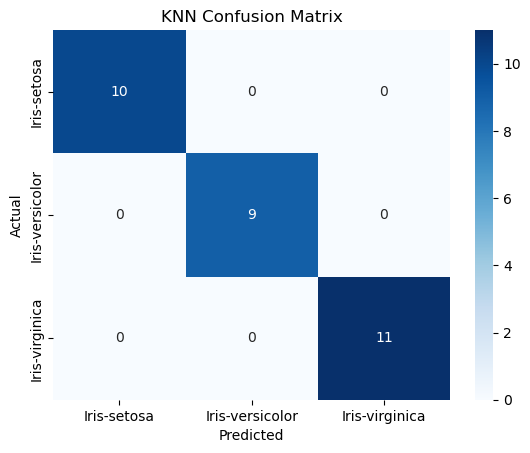

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap = 'Blues' , fmt='d', xticklabels = knn.classes_, yticklabels= knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [22]:
# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred))

Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### EXPERMENTING WITH DIFFERNET K VALUES(ELBOW METHOD)

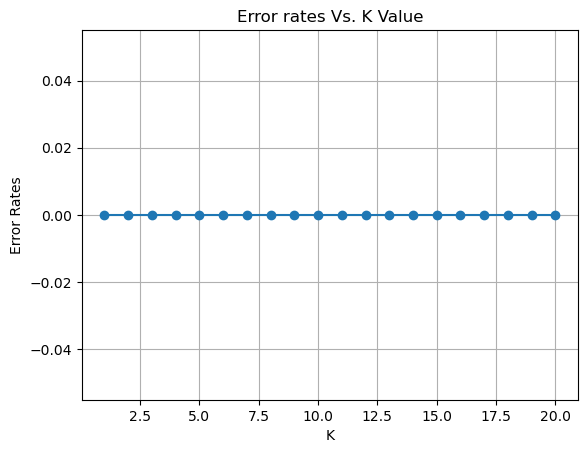

In [27]:
error_rates = []
k_range = range(1,21)


for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    pred_k = model.predict(x_test)
    error = 1- accuracy_score(y_test,pred_k)
    error_rates.append(error)

#Plotting error rates vs K.

plt.plot(k_range, error_rates, marker='o')
plt.title("Error rates Vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rates")
plt.grid(True)
plt.show()

### VISUALIZING DECISION BOUNDARIES (2D PROJECTION)


In [29]:
# USING ONLY 2 FEATURES FOR 2D PLOTTING( PETAL LENGTH AND PETAL WIDTH)

X_2d = data[['PetalLengthCm', 'PetalWidthCm']].values
y_2d = data['Species']
X_2d = StandardScaler().fit_transform(X_2d)

In [30]:
# Fit and plot decision boundaries

def plot_decision_boundary(X, y, model, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.Series(Z).map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).values
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label, color=cmap_bold[i])
    plt.title(title)
    plt.xlabel("Petal Length (standardized)")
    plt.ylabel("Petal Width (standardized)")
    plt.legend()
    plt.show()


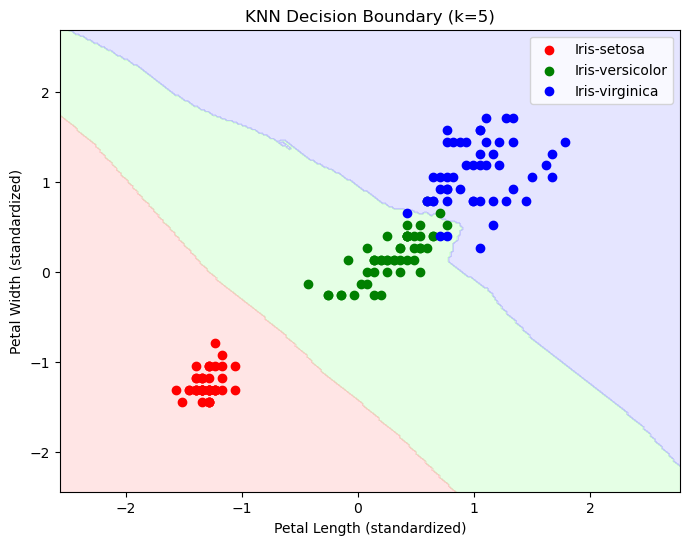

In [31]:
# Train model and plot
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_2d, y_2d)
plot_decision_boundary(X_2d, y_2d, knn_2d, "KNN Decision Boundary (k=5)")

### Visualizations Summary

-> Confusion Matrix Heatmap:
Displays the performance of the KNN classifier by showing the number of correct and incorrect predictions for each class.

-> Error Rate vs. K Value Plot (Elbow Method):
Helps choose the best value for k by showing how the error rate changes with different k values.

->  Decision Boundary Plot:
Visualizes how KNN separates the classes in 2D space using petal length and petal width. Clearly shows the regions associated with each class